# Analysis of Seattle AirBnB Open Data dataset

***NOTE: This is part of the first project "Write a Data Scientist Blog Post" of the UDACITY Nanodegree "Data Scientist". Please see README.md for details.***

## Imagine ...

... you want to visit Seattle, but you have no idea about the big and exciting city. As it is well known, a good starting point is crucial to explore a town and to have a great time. This is why one should spend a lot of time to find a good accommodation before booking the tickets for the freat trip.

To find a good accommodation in Seattle, we use the Seattle AirBnB Open Data dataset to answer the following questions
1. What's the best part of the city and the best time to travel?
2. When choosing a host, is there something in the profile telling us if we make a good choice?
3. Can we predict the price of an accommodation based on some key indicators that are important for you?

In [163]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Get a feeling for the dataset

The dataset is available at https://www.kaggle.com/airbnb/seattle/data. It consists of 3 csv files that are
* listings.csv ... contains main information about hosts and the offered properties
* calendar.csv ... shows detailed availability of properties and prices for the year 2016
* reviews.csv .... detailed reviews (as full text) of properties

Please download the files and put them next to this file. Then, read in the files and print initial informations

In [140]:
listings = pd.read_csv('listings.csv')
calendar = pd.read_csv('calendar.csv')
reviews = pd.read_csv('reviews.csv')

In [141]:
pd.options.display.max_columns = None
listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [142]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [143]:
listings.shape

(3818, 92)

In [144]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [145]:
calendar.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [146]:
# The number of rows is equal to the number of properties multiplied with days of a year 365
calendar.shape

(1393570, 4)

In [147]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [148]:
reviews.shape

(84849, 6)

## Question 1: Best place and time to stay in Seattle

Having a look on the listings, we see that Seattle has some districts. To choose the best one for you, we want to group the districts according to the list price. Here we assume that **the higher the price, the better the location** is... this is maybe wrong, but we neet to make some assumption.

In [333]:
# Choose columns of interest
listings_tmp = listings[["neighbourhood_group_cleansed", "price"]]

In [334]:
# We are lucky, there are no columns with unset data --> no data cleaning necessary.
sum(listings_tmp.price.isna())

0

In [343]:
# Since the column "price" contains strings of the form "$XX.XX" --> convert to floats
# Use the following function for conversion
from re import sub

def price_to_float(df):
    '''
    This function checks if a column "price" is available and if it has string type entries.
    If so, the column is replaced by a new column with the same name but with entries converted
    to floats.
    '''
    # Quit for empty df
    if (df.shape[0] <= 0):
        return df
    
    if (len(df.columns[df.columns.str.match(r'(.*price.*)') == 1]) > 0):
        # There is a price, check the type is a string and exit if not
        if (type(df['price'][0]) != np.str):
            return df
    
    # Convert from string to float
    df = df.rename(columns={"price": "price_str"})
    price_to_float_lambda = lambda row: float(sub(r'[^\d.]', '', row)) if type(row) == np.str else row
    df['price'] = df.price_str.apply(price_to_float_lambda)
    df = df.drop(columns = ["price_str"])
    
    return df

In [344]:
listings_tmp = price_to_float(listings_tmp)
listings_tmp.head()

,neighbourhood_group_cleansed,price
0,Queen Anne,85.0
1,Queen Anne,150.0
2,Queen Anne,975.0
3,Queen Anne,100.0
4,Queen Anne,450.0


### Best place to go

In [338]:
# To get the best location (which we set to "most expansive one" here), get a list of
# all districts and the according price index.
neighbourhood_price = listings_tmp.groupby("neighbourhood_group_cleansed").mean().sort_values(by = "price", ascending = False)
neighbourhood_price

,price
neighbourhood_group_cleansed,
Magnolia,177.672131
Queen Anne,157.223729
Downtown,154.405660
West Seattle,141.359606
Cascade,140.101124
Capitol Hill,130.592593
Central Area,128.338753
Ballard,124.682609
Other neighborhoods,119.968514


In [339]:
neighbourhood_price.describe()

,price
count,17.000000
mean,119.838682
std,27.847598
min,83.278481
25%,93.639344
50%,119.968514
75%,140.101124
max,177.672131


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text xticklabel objects>)

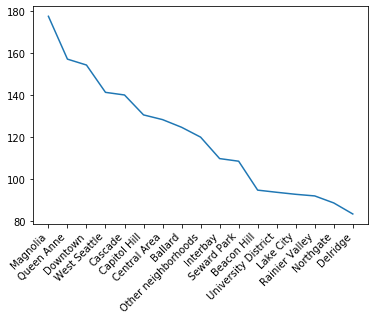

In [340]:
# Create some nice plots for the blog post.
plt.plot(neighbourhood_price)
plt.xticks(rotation=45, ha='right')
#plt.savefig('Q1_plot.png')

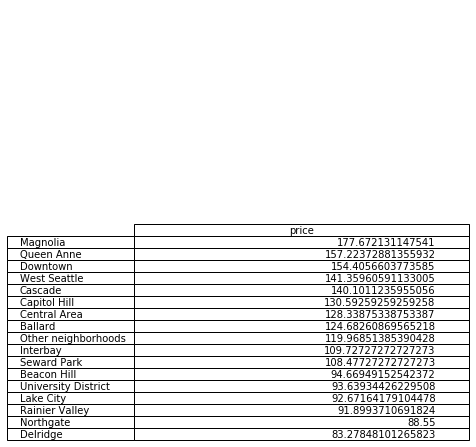

In [279]:
# Unfortunatelly, it is not that easy to make a nice plot of a table....
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

pd.plotting.table(ax = ax, data = neighbourhood_price)
#plt.savefig('Q1_table.png')

### Best time to go

To answer this question, we have a look on the calendar and check the dates the prices are lower.

In [429]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [430]:
# Convert price to floats and drop unneeded columns
calendar_tmp = price_to_float(calendar)
calendar_tmp = calendar_tmp.drop(columns = ["listing_id", "available"])

In [431]:
calendar_tmp.head()

,date,price
0,2016-01-04,85.0
1,2016-01-05,85.0
2,2016-01-06,NaN
3,2016-01-07,NaN
4,2016-01-08,NaN


([<matplotlib.axis.XTick at 0x137933eadc8>,
 <a list of 13 Text xticklabel objects>)

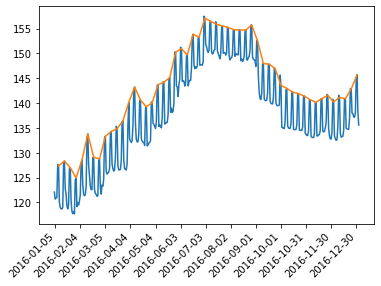

In [432]:
# Now, group by date and plot the prices.
# Note that the first date is 2016-01-04, which was a Monday. We use this to plot the prices for the
# weekends as well...
calendar_price = calendar_tmp.groupby("date").mean()
# Price all
plt.plot(calendar_price)
# Price weekends
plt.plot(calendar_price[5::7])
# Plot...
plt.xticks(calendar_price.index[1::30], rotation=45, ha='right')
#plt.savefig('Q1_time.png')

In [433]:
calendar_price.describe()

,price
count,365.000000
mean,137.901783
std,9.860142
min,117.685413
25%,132.446443
50%,136.731206
75%,146.930502
max,157.480000


In [434]:
# We see that there is a massive difference between prices at the weekend and during the week.
# Check how much this is
difference = calendar_price[5::7].values - calendar_price[2::7].values
np.mean(difference)

7.713178497717234

### Question 1 -- Conclusion

Having a look on the table and the description, the top 25% districts are 
* Magnolia
* Queen Anne
* Downtown
* West Seattle

So if money is no problem for you, get an accomodation there. The mean price is around $120, if this is more your budget, look for a place in e.g., 
* Ballard
* Interbay

The cheapest 25% districts cost you around $90, so go to e.g.,
* Rainier Valley
* Northgate
* Delridge

if you want to save some money !!

So furthermore, when is the best time to travel to Seattle? this question depends on what you think "best time" means for you.  
If you want to save money, don't go in the summer time!! It seems that the prices are the lowest at the beginning of the year and continuously increase until summer. In autumn, it gets cheaper again, but accomodations are still more expensive compared to the first months of the year.

In addition, if you want to save money, avoid weekends, since booking an accomodation during weekends approximately costs you $7.70 more than during the week. 

However, saving money is not the most important... if you want to party and enjoy the summer times, visit Seattle in July or August!! High prices indicate that Seattle is more frequented during this time, so this months are probably the most attractive ones.

## Question 2: When booking on AirBnB, what should I be aware of ?

To be honest, I have just booked an accomodation using AirBnB once in my life and I was a bit unlucky with my choice of the host...

Anyway, I very much like the idea of AirBnB and it's clear that the provider cannot guarantee that all hosts are nice. So lets give it another try, but this time, I will have a more detailed look on the hosts profile. Maybe, there are some indicators that shows me if the host is nice and the offered property is great. 

In [6]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [17]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [31]:
pd.options.display.max_columns = None
listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [84]:
listings.sort_values(by = "id", axis = 0).head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
2184,3335,https://www.airbnb.com/rooms/3335,20160104002432,2016-01-04,Sweet Seattle Urban Homestead 2 Bdr,Welcome! If you stay here you will be living i...,Welcome! Come enjoy your time in Seattle at a...,Welcome! If you stay here you will be living i...,none,This is a very diverse neighborhood with a var...,We are an urban farmy oasis and invite you to ...,"Light rail is walking distance, bus lines are ...",https://a1.muscache.com/ac/pictures/76027692/e...,https://a1.muscache.com/im/pictures/76027692/e...,https://a1.muscache.com/ac/pictures/76027692/e...,https://a1.muscache.com/ac/pictures/76027692/e...,4193,https://www.airbnb.com/users/show/4193,Jessica,2008-11-10,"Seattle, Washington, United States","Hello! I am an avid gardener, community organ...",within a few hours,88%,100%,f,https://a2.muscache.com/ac/users/4193/profile_...,https://a2.muscache.com/ac/users/4193/profile_...,Dunlap,4.0,4.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"44th Place South, Seattle, WA 98118, United St...",Dunlap,Dunlap,Rainier Valley,Seattle,WA,98118,Seattle,"Seattle, WA",US,United States,47.529846,-122.275840,t,NaN,Entire home/apt,4,1.0,2.0,2.0,Real Bed,"{""Wireless Internet"",Kitchen,""Free Parking on ...",NaN,$120.00,$550.00,"$1,600.00",$200.00,$75.00,2,$10.00,2,730,3 months ago,t,0,4,34,309,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,WASHINGTON,f,strict,f,f,4,NaN
3118,4291,https://www.airbnb.com/rooms/4291,20160104002432,2016-01-04,Sunrise in Seattle Master Suite,NaN,"Located in Seattle, this is a spacious, clean...","Located in Seattle, this is a spacious, clean...",none,NaN,NaN,NaN,https://a2.muscache.com/ac/pictures/19407574/6...,https://a2.muscache.com/im/pictures/19407574/6...,https://a2.muscache.com/ac/pictures/19407574/6...,https://a2.muscache.com/ac/pictures/19407574/6...,35749,https://www.airbnb.com/users/show/35749,Jess & Joey,2009-09-02,"Seattle, Washington, United States",We are a young Seattle couple who have been re...,within a day,100%,100%,f,https://a2.muscache.com/ac/pictures/769c80c5-f...,https://a2.muscache.com/ac/pictures/769c80c5-f...,Roosevelt,6.0,6.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"15th Ave Ne, Seattle, WA 98115, United States",Roosevelt,Roosevelt,Other neighborhoods,Seattle,WA,98115,Seattle,"Seattle, WA",US,United States,47.687251,-122.313130,f,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""F...",NaN,$82.00,$525.00,"$1,925.00",NaN,$30.00,1,$0.00,2,60,3 months ago,t,30,60,90,365,2016-01-04,35,2013-07-01,2015-10-18,92.0,10.0,9.0,10.0,9.0,9.0,9.0,f,NaN,WASHINGTON,f,mo

In [39]:
listings[listings.has_availability == 't'].shape

(3818, 92)

In [29]:
listings.groupby('neighbourhood').mean()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
neighbourhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alki,5.513224e+06,2.016010e+13,1.568420e+07,2.086957,2.086957,47.571967,-122.408159,4.565217,1.391304,1.826087,2.391304,1400.0,1.608696,2.217391,791.956522,20.304348,44.173913,67.521739,250.347826,15.956522,95.933333,9.666667,9.733333,9.866667,9.933333,9.866667,9.466667,NaN,1.260870,1.871250
Arbor Heights,3.961523e+06,2.016010e+13,9.899291e+06,1.000000,1.000000,47.510145,-122.381473,4.000000,1.166667,1.000000,1.666667,NaN,2.000000,3.000000,384.333333,18.333333,47.000000,76.666667,260.000000,15.333333,98.000000,9.666667,9.666667,10.000000,10.000000,8.666667,9.333333,NaN,1.000000,1.030000
Atlantic,5.267910e+06,2.016010e+13,1.734774e+07,1.940000,1.940000,47.594896,-122.304818,3.700000,1.470000,1.420000,1.780000,650.5,1.620000,1.860000,707.900000,13.860000,32.100000,50.200000,218.920000,22.980000,95.325581,9.627907,9.627907,9.813953,9.767442,9.093023,9.558140,NaN,1.660000,2.249545
Ballard,4.924953e+06,2.016010e+13,1.432290e+07,5.328638,5.328638,47.674617,-122.379902,3.394366,1.274648,1.408451,1.845070,386.5,1.859155,2.286385,732.694836,15.859155,34.403756,55.018779,250.807512,33.380282,95.382514,9.737705,9.666667,9.907104,9.918033,9.759563,9.546448,NaN,1.680751,2.613169
Belltown,5.288179e+06,2.016010e+13,1.187108e+07,34.089109,34.089109,47.615125,-122.345542,3.887255,1.237500,1.118227,1.901961,710.0,1.372549,2.137255,1265.362745,18.348039,39.882353,62.784314,224.965686,21.235294,93.340659,9.478022,9.543956,9.582418,9.686813,9.807692,9.192308,NaN,5.039216,1.948901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallingford,4.623183e+06,2.016010e+13,1.186692e+07,4.944056,4.944056,47.659809,-122.333501,3.643357,1.244755,1.482517,1.916084,1375.0,1.979021,2.335664,727.146853,16.482517,35.433566,55.349650,251.888112,26.447552,94.168000,9.664000,9.440000,9.752000,9.800000,9.744000,9.520000,NaN,4.573427,1.650476
Wedgewood,4.504849e+06,2.016010e+13,1.531941e+07,2.133333,2.133333,47.689881,-122.291056,2.800000,1.166667,1.333333,1.800000,NaN,2.066667,2.266667,514.133333,16.600000,39.266667,62.533333,211.600000,17.933333,94.000000,9.400000,9.300000,9.900000,9.800000,9.300000,9.400000,NaN,2.066667,1.521000
Westlake,6.212587e+06,2.016010e+13,2.368609e+07,1.166667,1.166667,47.631627,-122.342116,2.916667,1.625000,1.333333,1.666667,NaN,1.750000,5.166667,860.500000,17.250000,39.083333,58.583333,252.500000,4.833333,96.500000,9.375000,9.375000,9.750000,9.875000,9.625000,9.375000,NaN,1.166667,1.321250


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002171D26DF08>,
      dtype=object)

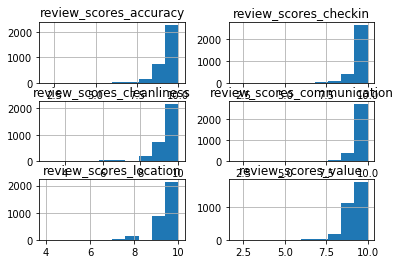

In [53]:
%matplotlib inline

# "review_scores_rating"
listings_ratings = listings[["review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]]

listings_ratings.hist()

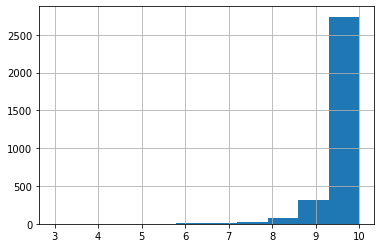

In [60]:
listings_ratings.mean(axis = 1).hist()

In [79]:
calendar_available = pd.concat([calendar, pd.get_dummies(calendar["available"], drop_first = False, prefix = "available")], axis = 1)
calendar_available.head()

,listing_id,date,available,price,available_f,available_t
0,241032,2016-01-04,t,$85.00,0,1
1,241032,2016-01-05,t,$85.00,0,1
2,241032,2016-01-06,f,NaN,1,0
3,241032,2016-01-07,f,NaN,1,0
4,241032,2016-01-08,f,NaN,1,0


In [82]:
calendar_available.groupby("listing_id").sum()

,available_f,available_t
listing_id,,
3335,56.0,309.0
4291,0.0,365.0
5682,56.0,309.0
6606,0.0,365.0
7369,312.0,53.0
...,...,...
10332096,0.0,365.0
10334184,4.0,361.0
10339144,365.0,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002171F14E088>,
      dtype=object)

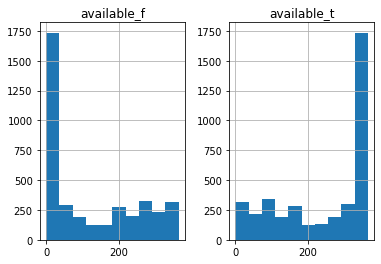

In [94]:
calendar_available.groupby("listing_id").sum().hist()

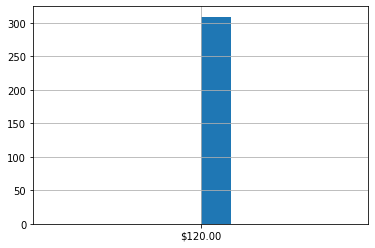

In [122]:
calendar_available[(calendar_available.listing_id == 3335) & (calendar_available.available == "t")].price.hist()

In [144]:
(2/30 + 32/60) / 2

0.3

In [136]:
32/60

0.5333333333333333

In [137]:
62/90

0.6888888888888889

In [138]:
327/365

0.8958904109589041

In [145]:
2/30

0.06666666666666667

In [123]:
listings[listings.id == 4973204]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3168,4973204,https://www.airbnb.com/rooms/4973204,20160104002432,2016-01-04,Queen Anne - Comforts of home,Charming newly renovated 1924 home is fully st...,Whether it's for a week-end away or a schedule...,Charming newly renovated 1924 home is fully st...,none,Lower Queen Anne is on the South slope of Quee...,Property is on a hill and has steps leading to...,Walk Score of 93! Most people in Seattle have...,https://a1.muscache.com/ac/pictures/107367128/...,https://a1.muscache.com/im/pictures/107367128/...,https://a1.muscache.com/ac/pictures/107367128/...,https://a1.muscache.com/ac/pictures/107367128/...,25636571,https://www.airbnb.com/users/show/25636571,Ben,2015-01-05,"Seattle, Washington, United States",My wife Kimberly and I grew up in the Seattle ...,within a few hours,100%,100%,t,https://a1.muscache.com/ac/users/25636571/prof...,https://a1.muscache.com/ac/users/25636571/prof...,Lower Queen Anne,1.0,1.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,"Aloha Street, Seattle, WA 98109, United States",Lower Queen Anne,Lower Queen Anne,Queen Anne,Seattle,WA,98109,Seattle,"Seattle, WA",US,United States,47.627151,-122.357463,t,House,Entire home/apt,5,1.0,2.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$165.00,NaN,NaN,$200.00,$75.00,4,$0.00,2,28,today,t,2,32,62,327,2016-01-04,27,2015-03-10,2015-09-13,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.69


In [127]:
sum(calendar[calendar.listing_id == 4973204].available == "f")

38

In [134]:
sum(calendar[calendar.listing_id == 4973204].price.isna())/365

0.10410958904109589

In [130]:
calendar[calendar.listing_id == 4973204].price.isna()

1156320     True
1156321     True
1156322     True
1156323     True
1156324     True
           ...  
1156680    False
1156681    False
1156682    False
1156683    False
1156684    False
Name: price, Length: 365, dtype: bool

In [69]:
pd.get_dummies(calendar["available"], drop_first = True)

,t
0,1
1,1
2,0
3,0
4,0
...,...
1393565,0
1393566,0
1393567,0
1393568,0


In [24]:
listings.corr()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
id,1.000000,NaN,0.546514,-0.023312,-0.023312,-0.016143,0.013360,-0.074279,-0.061821,-0.064113,-0.050568,-0.170288,-0.103058,-0.021601,0.101529,-0.068067,-0.075651,-0.086914,-0.159447,-0.506105,0.039246,0.045355,0.068112,-0.004710,0.003389,0.105444,0.087858,NaN,-0.051348,0.091716
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.546514,NaN,1.000000,-0.069613,-0.069613,-0.024217,0.014749,-0.099620,-0.057076,-0.075722,-0.065197,-0.184730,-0.083187,-0.024572,0.057532,-0.029677,-0.037683,-0.042542,-0.083078,-0.261822,0.027348,0.026768,0.047576,0.022116,0.025023,0.073277,0.078829,NaN,-0.176040,0.106389
host_listings_count,-0.023312,NaN,-0.069613,1.000000,1.000000,-0.012511,-0.000055,0.111210,0.068226,0.065931,0.085490,-0.020224,-0.059289,0.001894,0.022684,0.119792,0.124743,0.124052,0.086038,-0.062220,-0.109357,-0.122957,-0.044087,-0.190730,-0.137222,0.024161,-0.114171,NaN,0.224222,-0.117272
host_total_listings_count,-0.023312,NaN,-0.069613,1.000000,1.000000,-0.012511,-0.000055,0.111210,0.068226,0.065931,0.085490,-0.020224,-0.059289,0.001894,0.022684,0.119792,0.124743,0.124052,0.086038,-0.062220,-0.109357,-0.122957,-0.044087,-0.190730,-0.137222,0.024161,-0.114171,NaN,0.224222,-0.117272
latitude,-0.016143,NaN,-0.024217,-0.012511,-0.012511,1.000000,-0.155092,0.000335,-0.015003,0.039100,0.023000,-0.048056,0.034452,-0.001222,-0.004705,-0.019751,-0.037074,-0.036991,0.000565,-0.032761,-0.038086,-0.015072,-0.038183,-0.018381,-0.025117,0.096746,-0.019488,NaN,0.026750,-0.084988
longitude,0.013360,NaN,0.014749,-0.000055,-0.000055,-0.155092,1.000000,-0.071584,-0.017041,-0.055045,-0.067682,-0.107369,-0.023828,0.003406,-0.010435,-0.007231,0.002575,0.008444,-0.007926,-0.008260,-0.047121,-0.037005,-0.062576,-0.046990,-0.061539,-0.190567,-0.043979,NaN,0.086343,0.002583
accommodates,-0.074279,NaN,-0.099620,0.111210,0.111210,0.000335,-0.071584,1.000000,0.538439,0.770974,0.861119,0.439057,0.532796,0.017097,0.003291,-0.043169,-0.048761,-0.060468,-0.031535,-0.072978,-0.013101,-0.049665,0.011646,-0.019664,-0.013208,-0.037520,-0.062041,NaN,-0.029525,-0.144150
bathrooms,-0.061821,NaN,-0.057076,0.068226,0.068226,-0.015003,-0.017041,0.538439,1.000000,0.610937,0.532838,0.381094,0.304780,0.006358,-0.015322,-0.039447,-0.049399,-0.057346,-0.002326,-0.092147,0.045101,-0.006129,0.018063,-0.002939,-0.016067,-0.008959,0.014297,NaN,-0.002731,-0.167894
bedrooms,-0.064113,NaN,-0.075722,0.065931,0.065931,0.039100,-0.055045,0.770974,0.610937,1.000000,0.753167,0.448786,0.457009,0.011957,-0.008591,-0.076559,-0.090212,-0.103121,-0.049788,-0.105555,0.023257,-0.011943,-0.008089,0.010509,0.001113,-0.028991,-0.001208,NaN,-0.045543,-0.230287


In [9]:
calendar.shape

(1393570, 4)

In [10]:
reviews.shape

(84849, 6)

In [11]:
listings.shape

(3818, 92)

In [15]:
list(listings.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',
